# Business problem: 
Director of a department wants to know the demand of their service so she can budget resources to meet the demand, she'd prefer daily or evenly hourly, if not possible then weekly works too.




      

# Considerations before programming

## Q1 What is the forecast lead time or forecasting horizon?  
    Because of Covid, things changed quickly, so after exploring data and discussing withing business stakeholders, we decided a number. Let's see we want to forecast for next two weeks.
## Q2 What time buckets are we forecasting (hourly, daily, weekly)?
    Here, I checked hourly, daily and weekly data trend, hourly data presented little to no pattern, therefore we opted for daily.
## Q3 What seasonalities do you consider?
    Here plots were made on to see if there were day of the week, day of the month and annual seasonalities.
    Per Prof. Rob Hyndman (https://robjhyndman.com/hyndsight/dailydata/) and the patterns in our datasets, day of the week and annual seasonality were considered.
## Q4 what level in the product hierarchy are we looking at?
    Sometimes you could forecast at the most granular level and sum up, or at the highest level then cascade down, or at the middle level then sum up and cascade down. The best hierarchy can be tested out on the data.

## Q5 How is the metric weighted?
    When the target variable varies significantly from series to series, sMAPE is preferred, otherwise RMSE, MAPE,sMAPE might point to the same solution.
    There are arguments about the definition of sMAPE, so unless you want to compare new algorithm's performance against M3 competition, MAPE, RMSE, MASE, AICc work fine.

    https://robjhyndman.com/hyndsight/smape/

In [ ]:
install.packages("fpp2")
library("fpp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.3.5     ✔ fma       2.4  
✔ forecast  8.16      ✔ expsmooth 2.3  





In [ ]:
# Below data is from M4 time series forecasting competiton
mydata <- data.frame(read.csv("/content/sample_data/Daily_train.csv", header=TRUE))
n <- ncol(mydata)
n

[1] 9920

In [ ]:
head(mydata,5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# Take one series as an example
raw_data <- ts(mydata[1:800,"V3"], frequency=365, start = c(2008,1,1))

In [ ]:
raw_data

A Time Series:
  [1]  1019.3000  2793.8000  1088.5000  1078.0000  2956.4400   155.3886
  [7]   107.2580  1003.2300  1002.4000  2073.4000  1108.4000  1896.1000
 [13]  3015.6000  1965.1000  2500.3000 14920.9000  3222.5000 11981.1000
 [19]   452.6000 11563.8000   431.3000  1307.4500  1175.3000  1244.4500
 [25]  1038.3100  1156.8400  1118.6700  1007.7700  2085.3000  1007.7700
 [31]  9938.3000  9938.3000  6736.0487   750.0000  4176.0000  6098.2500
 [37]  2944.0000  3157.0000  3146.0000  3259.0000 10850.3000 11111.5000
 [43]   999.9000  8630.0000   994.6000  9946.0000   994.6000    98.7550
 [49]    99.7125    99.7000   980.3000  3748.4000   980.3000  2291.3000
 [55]  4340.0000   121.0000  1479.0000  1680.0000  4240.0000   881.7000
 [61]  6060.0000  5087.5000  4315.0000  1339.5000  5580.0000  1812.5000
 [67]  4245.0000  4537.5000   250.0000  1450.0000  2291.3000  1697.0000
 [73]   980.3000  1752.8000  1752.8000  1592.2000  1592.2000  3913.6000
 [79]  9305.0000  2291.3000  1406.8000  1015.4000  3053.5000  1752.8000
 [85] 10492.2000  1661.0000  2067.0000  2107.0000  2002.0000  2008.0000
 [91]  2007.0000  2012.0000  2133.0000  2025.0000  2013.0000  1997.0000
 [97]  2013.0000  1388.9000  8600.9000  1590.2700  5706.7000   864.0300
[103]  5306.9000  4897.9000  5418.9000  1219.4500  1313.5500  1021.6200
[109]  1021.6200  1021.6200  6193.6000  4102.9000  4546.3000  2807.3000
[115]  2578.7000  3629.0000  1427.2500 18410.7000 18291.9000  4008.8000
[121]  5714.3000  4380.0000  7878.2000  1113.2500  1375.8900   934.5900
[127]  6446.0000   700.0000  6700.0000   270.2130   800.0000   600.0000
[133]  1500.0000   800.0000  1000.0000  1000.0000   700.0000   750.0000
[139]  1500.0000  2000.0000  1008.6500  1008.9000  1008.8800  5432.8000
[145]  4506.7000   894.0800   527.5400  6762.7000  4777.7000  1065.3000
[151]  4463.0457  1833.0000  1043.9000 10951.4000  2266.6000  3739.2000
[157]  1441.0000  1583.5700  6645.5000  1821.9000  1222.1000   603.5000
[163]   827.8000  2310.7000  2741.1000   200.0000   200.0000  1274.2188
[169]  1227.6562  6706.2500  6706.2500  6706.2500  6706.2500  1040.9400
[175]  1040.9400  6656.2500  6637.5000  6653.1200  8600.0000  8600.0000
[181]  8600.0000  8600.0000  6309.3800  6309.3800  6309.3800  6309.3800
[187]  7265.6200  7228.1200  7259.3800  5775.0000  5775.0000  5775.0000
[193]  1452.5000  1129.8438  1129.8438  1129.8438  6856.2500  6856.2500
[199]  6790.6200  6790.6200  7628.0000  1150.0000  1150.0000  1150.0000
[205]  7178.1250  7209.3750  7178.1250  6990.6200  6990.6200  6990.6200
[211]  6990.6200  1247.0312  1247.0312  1247.0312  1247.0312  7628.0000
[217]  9109.3800  9109.3800  9109.3800  9109.3800  9163.0000  1231.0938
[223]  1155.6200  1155.6200  1155.6200  1219.3750  1219.3750  1219.3750
[229]  1219.3750  1177.1875  1177.1875  1177.1875  1450.0000  1450.0000
[235]  1138.7500  1138.7500  1138.7500  1138.7500  1225.0000  1225.0000
[241]  1225.0000  1183.4375  1183.4375  1183.4375  1183.4375  1303.4375
[247]  1303.4375   856.6500  1362.6562  1362.6562  1362.6562  1102.6562
[253]  1102.6562  1102.6562  1102.6562  1060.3100  1069.0600  1069.0600
[259]  1069.0600  1055.6200  1055.6200  1055.6200  1039.0600  1039.0600
[265]  1039.0600  1083.1200  1083.1200  1083.1200  1083.1200  1055.0000
[271]  1055.0000  1055.0000  1055.0000   973.4380   973.4380   973.4380
[277]   973.4380   996.2500   996.2500   996.2500  1063.4400  1063.4400
[283]  1063.4400   985.0000   985.0000  1134.6875  1134.6875  1134.6875
[289]  1134.6875  8918.7500  8918.7500  8918.7500  8918.7500  8212.5000
[295]  8012.5000  8012.5000  8012.5000  8012.5000  9171.8800  9171.8800
[301]  9171.8800  9615.6250  6878.1200  6818.7500  6850.0000  6321.8800
[307]  6321.8800  6321.8800  6321.8800  6678.1200  6678.1200  6678.1200
[313]  6678.1200  6443.7500  6443.7500  6443.7500  6443.7500  9187.5000
[319]  9187.5000  9187.5000  9187.5000  9415.6200  9415.6200  9415.6200
[325]  9415.6200  9106.2500  9112.5000  9112.5000  9318.7500  9318.7500
[331]  9318.7500  7425.00

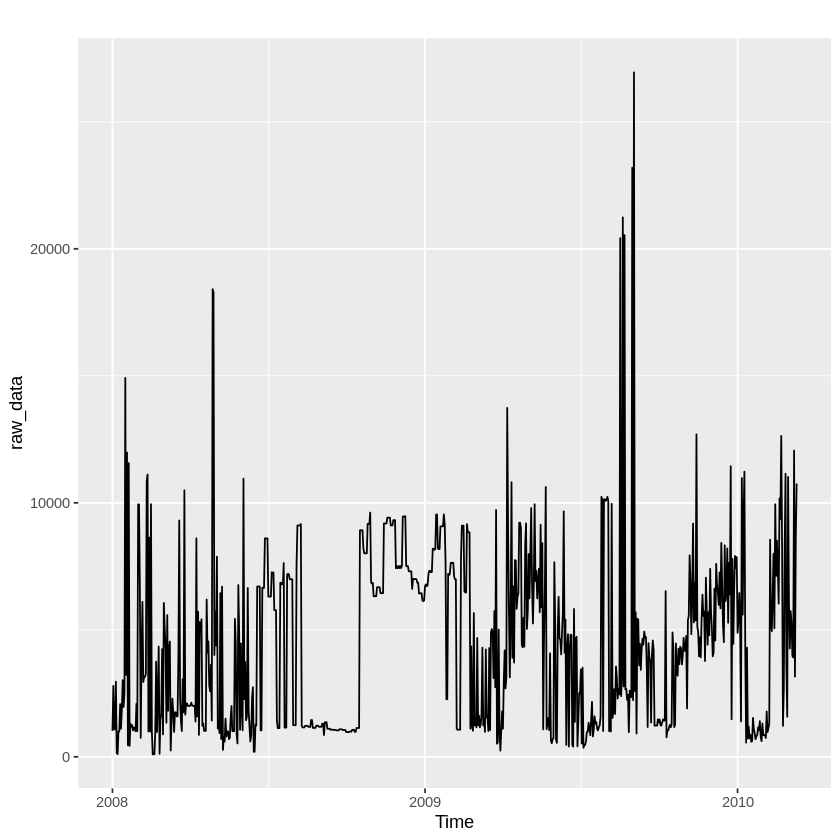

In [ ]:
autoplot(raw_data)

## From above we can see:
1.   There doesn't seem to be an obvious trend
2.   It seems to be seasonal



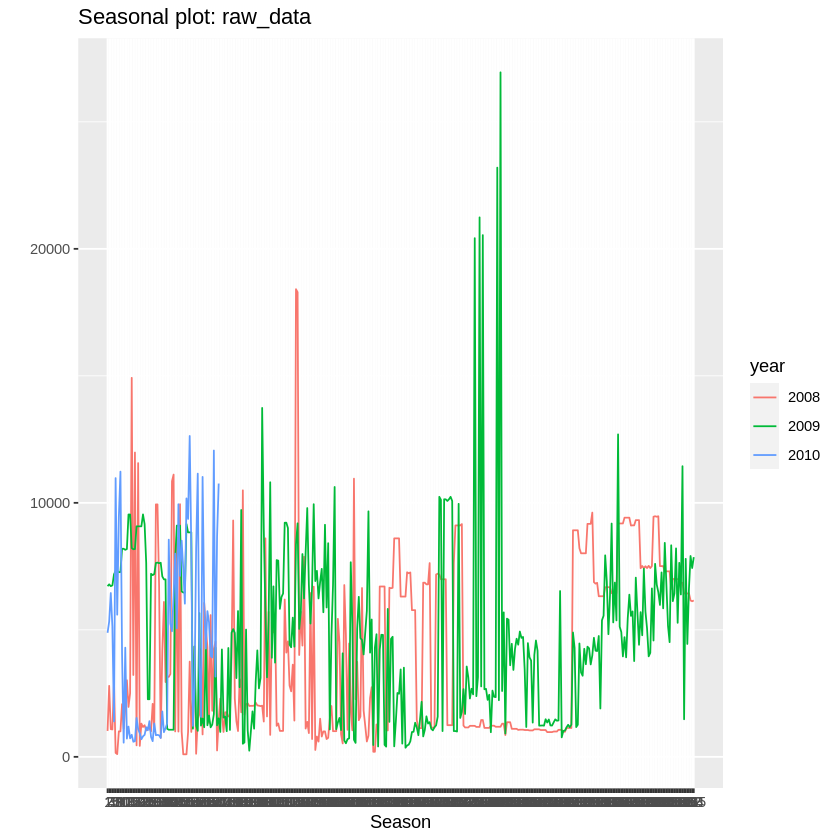

In [ ]:
ggseasonplot(raw_data)

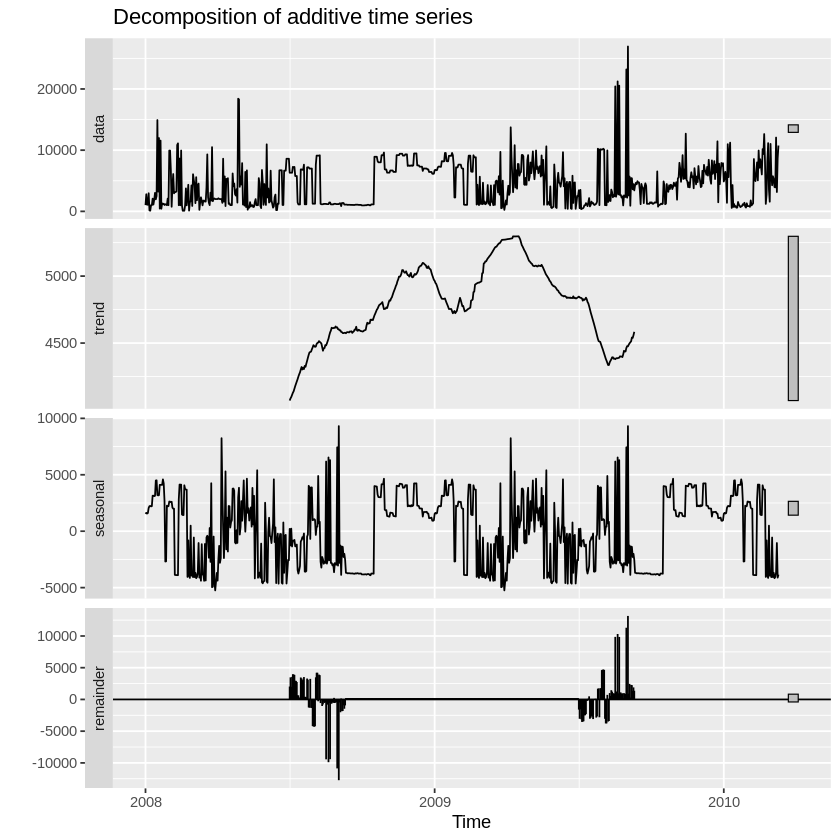

In [ ]:
decomposed_additive <- decompose(raw_data, type = "additive")
autoplot(decomposed_additive)

Our original data is now broken into 3 components.
1. a seasonal component (panel 3)
2. a trend component （panel 4)
3. a remainder (panel 2)
The decomposition was additive

data = trend + seasonal + remainder

### 1. Some simple forecasting methods:

#### 1.1 Naive method

Naive method and some simple forecasting methods can be served as internal benchmark, which can help sound an alarm for cases where the forecasts for an item are performing significantly worse than their benchmark.

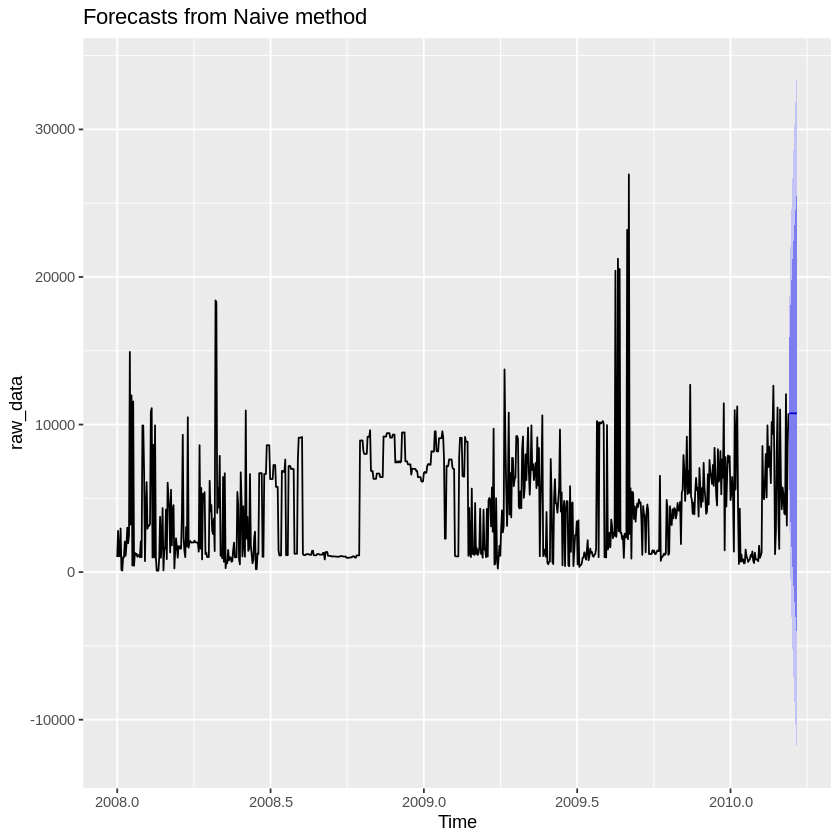

In [ ]:
autoplot(naive(raw_data))

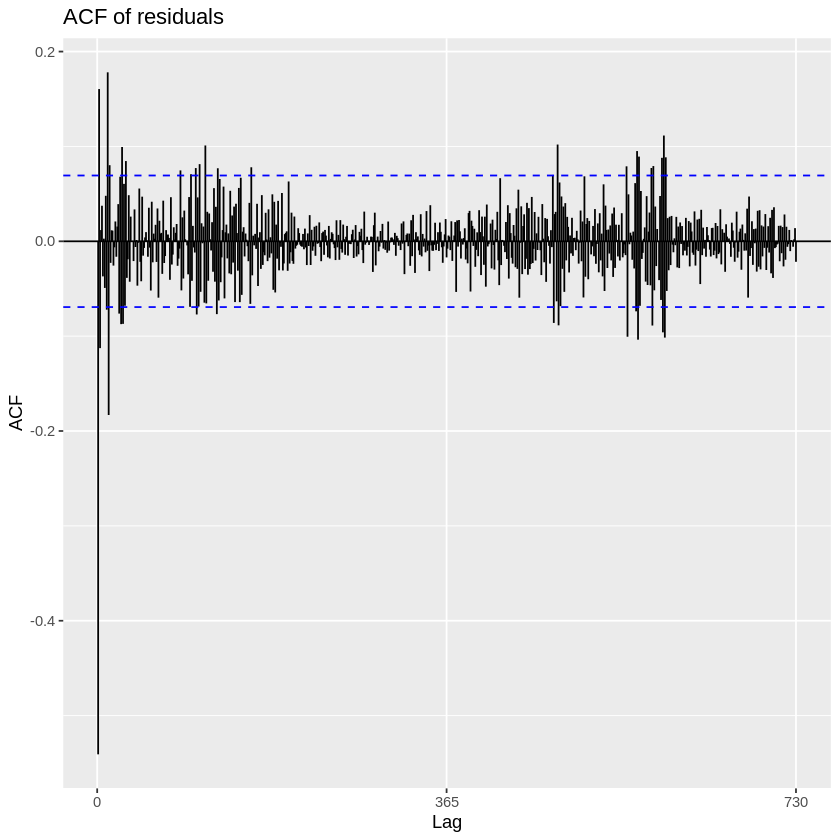

In [ ]:
res <- residuals(naive(raw_data))
ggAcf(res) + ggtitle("ACF of residuals")
# Autocorrelation function or ACF shows that there is trend that isn't modeled by naive method


	Ljung-Box test

data:  Residuals from Naive method
Q* = 558.95, df = 160, p-value < 2.2e-16

Model df: 0.   Total lags used: 160



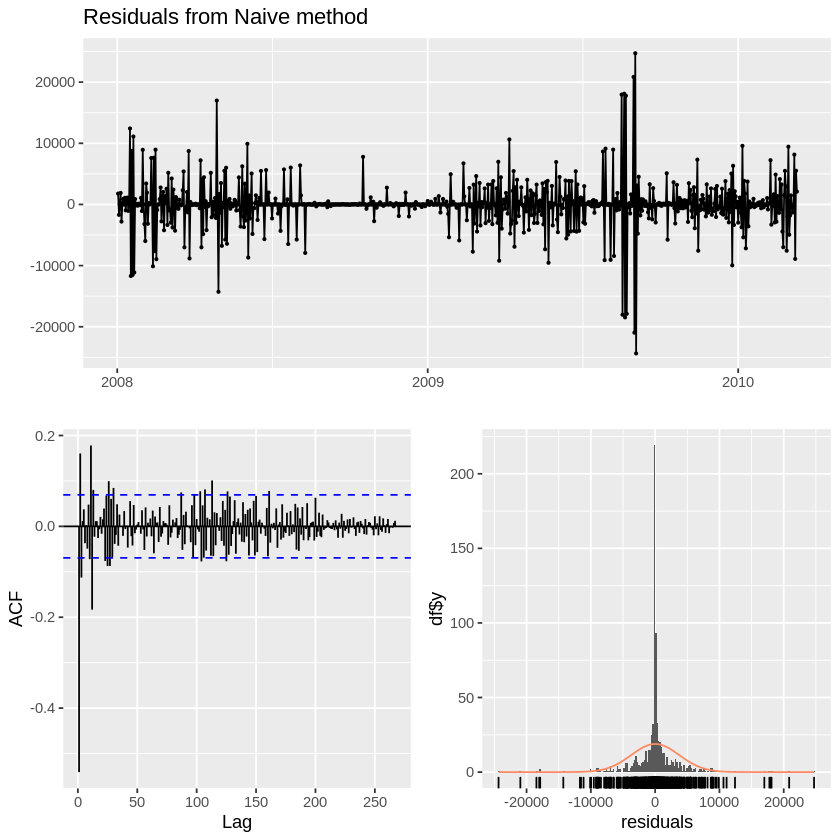

In [ ]:
checkresiduals(naive(raw_data))

In [ ]:
summary(naive(raw_data))


Forecast method: Naive method

Model Information:
Call: naive(y = raw_data) 

Residual sd: 3727.6891 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 12.19111 3727.689 1905.128 -64.35545 94.02685 0.498447 -0.5408204

Forecasts:
          Point Forecast       Lo 80    Hi 80       Lo 95    Hi 95
2010.1918          10760  5982.77423 15537.23   3453.8637 18066.14
2010.1945          10760  4003.98252 17516.02    427.5629 21092.44
2010.1973          10760  2485.60224 19034.40  -1894.5993 23414.60
2010.2000          10760  1205.54846 20314.45  -3852.2727 25372.27
2010.2027          10760    77.79843 21442.20  -5577.0175 27097.02
2010.2055          10760  -941.76553 22461.77  -7136.3060 28656.31
2010.2082          10760 -1879.35135 23399.35  -8570.2198 30090.22
2010.2110          10760 -2752.03495 24272.03  -9904.8742 31424.87
2010.2137          10760 -3571.67731 25091.68 -11158.4090 32678.41
2010.2164          10760 -4346.91433 258

#### 1.2 Simple Exponential Smoothing


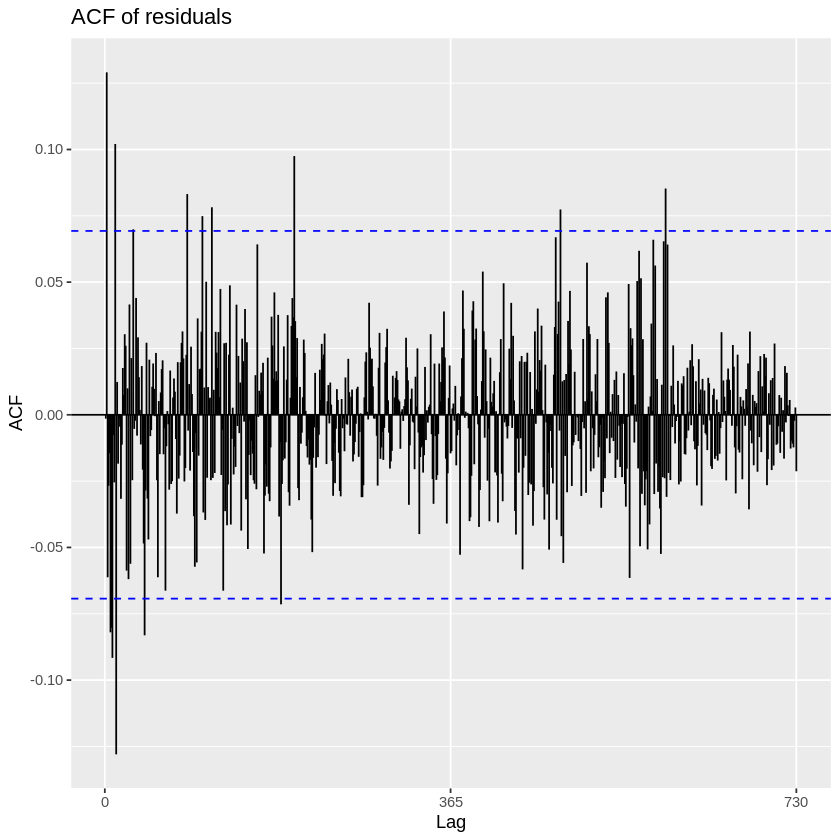

In [ ]:
res <- residuals(ses(raw_data))
ggAcf(res) + ggtitle("ACF of residuals")
# Below ACF graph looks better, but there are still variations not modeled

In [ ]:
summary(ses(raw_data))
# Y(T+1|T) = 0.258*YT + (1-0.258)Y(T|T-1)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = raw_data) 

  Smoothing parameters:
    alpha = 0.258 

  Initial states:
    l = 1560.6171 

  sigma:  2994.798

     AIC     AICc      BIC 
18159.10 18159.13 18173.15 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 29.52405 2991.052 1882.678 -84.69095 108.8645 0.4925731
                     ACF1
Training set -0.001465812

Forecasts:
          Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2010.1918       7653.652 3815.665 11491.64 1783.9572 13523.35
2010.1945       7653.652 3690.016 11617.29 1591.7942 13715.51
2010.1973       7653.652 3568.230 11739.07 1405.5385 13901.77
2010.2000       7653.652 3449.971 11857.33 1224.6766 14082.63
2010.2027       7653.652 3334.949 11972.36 1048.7654 14258.54
2010.2055       7653.652 3222.912 12084.39  877.4193 14429.89
2010.2082       7653.652 3113.639 12193.67  710.3004 14597.00
20

## 1.3 Exponential Smoothing Family

Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older.

This framework generates reliable forecasts quickly and for a wide range of time series, which is a great advantage and of major importance to applications in industry.

Warning message in ets(raw_data):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


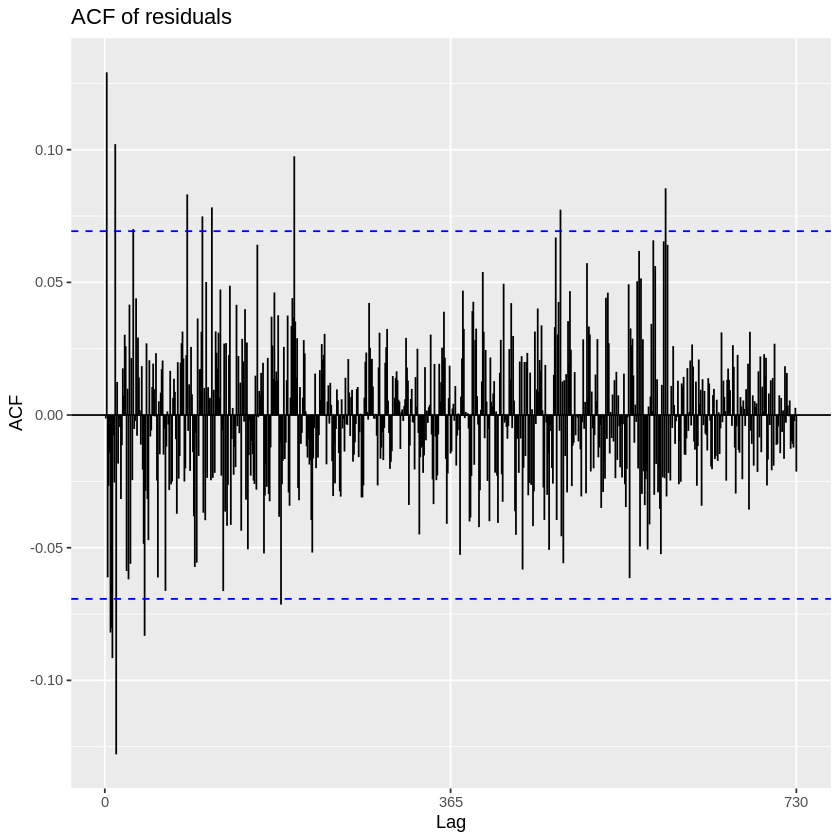

In [ ]:
res <- residuals(forecast(ets(raw_data)))
ggAcf(res) + ggtitle("ACF of residuals")

In [ ]:
summary(ets(raw_data))
# From below summary we can see that the selected model from EST family is a 
# Model with additive trend component, with no seasonal component
# Which explains why ETS and SES yield similar results
# Akaike's information criterion (AIC)
# AICc is particularly useful for short time series, because it is a proxy for the one-step forecast out-of-sample MSE. 
# Choosing the model with the minimum AICc value allows both the number of parameters and the amount of noise to be taken 
# into account.
# Y(T+1|T) = 0.2578*YT + (1-0.2578)Y(T|T-1)

Warning message in ets(raw_data):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


ETS(A,N,N) 

Call:
 ets(y = raw_data) 

  Smoothing parameters:
    alpha = 0.2578 

  Initial states:
    l = 1462.5946 

  sigma:  2994.802

     AIC     AICc      BIC 
18159.10 18159.13 18173.15 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 30.01366 2991.056 1882.622 -84.63296 108.8177 0.4925585
                     ACF1
Training set -0.001288704

## 1.4 ARIMA family

ARIMA models provide another approach to time series forecasting.
ETS and ARIMA models are the two widely used approaches to time series forecasting, and provide complementary approaches to the problem.

ARIMA aims to describe the autocorrelations in the data.

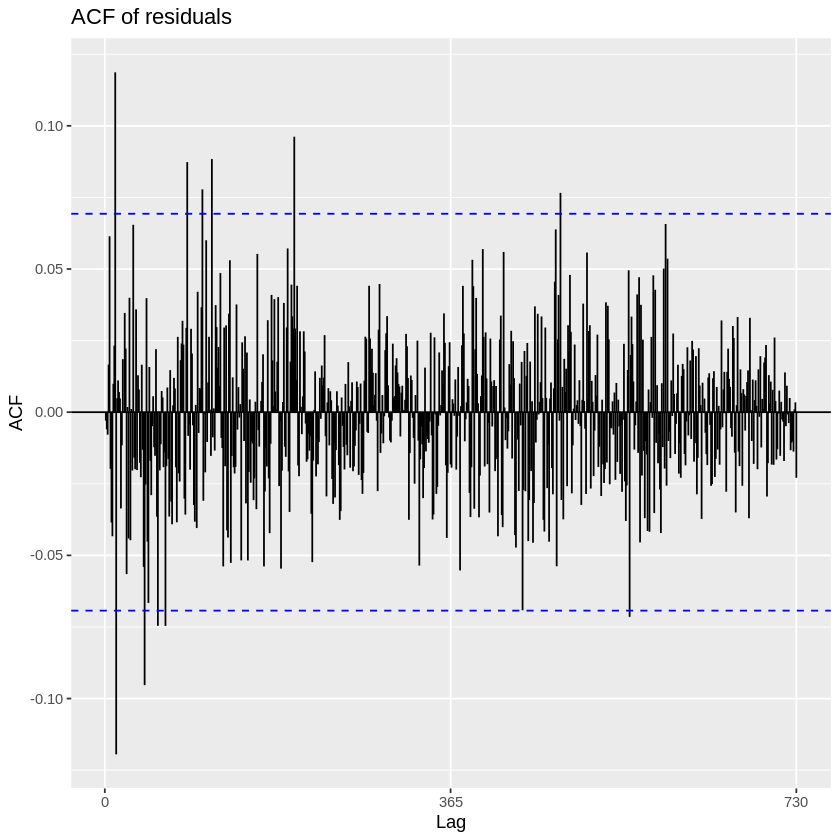

In [ ]:
res <- residuals(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14 ,bootstrap=T)
ggAcf(res) + ggtitle("ACF of residuals")

In [ ]:
summary(auto.arima(raw_data))
# Yt = 0.1593*Y(t-1) - 0.2494*Y(t-2) - 0.9095e(t-1)

Series: raw_data 
ARIMA(2,1,1) 

Coefficients:
         ar1     ar2      ma1
      0.1593  0.2494  -0.9095
s.e.  0.0462  0.0434   0.0267

sigma^2 = 8665072:  log likelihood = -7514.7
AIC=15037.4   AICc=15037.45   BIC=15056.13

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE
Training set 44.10649 2936.281 1888.11 -86.58467 110.2495 0.4939943
                     ACF1
Training set -0.002935454

From above models we can see that the selected model from ARIMA family yields the lowest RMSE, AICc and MAE. We will use this model to forecast.

###  Above process isn't scalable when number of series is large, therefore for work project I split data into train and test, and then automatically selected the best model based on the sMAPE (Symmetric mean absolute percentage error) on test dataset, then forecast on the whole series.

## M4 time series competition
## https://github.com/Mcompetitions/M4-methods


TBATS: can model multiple seasonal patterns and it is relatively slower than the rest of models

Theta: M3 competition's winning method, Prof.Hyndman demonstrated that it is a special case of simple exponential smoothing with drift where the drift paramter is half the slope of the linear trend fitted to the data.
https://robjhyndman.com/papers/Theta.pdf

M4 competition

## References:
https://otexts.com/fpp2/


https://robjhyndman.com/hyndsight/

Below is a sample code for scalable forecasting.
My work project added more models to the candidate pool based on characteristics of work data.


https://github.com/Mcompetitions/M4-methods/blob/master/223%20-%20Arsa-Nik/daily-v12.R

In [ ]:
install.packages(c("zoo","forecast","doParallel","rstudioapi"))
library(zoo)
library(forecast)
library(doParallel)
library(rstudioapi)

rm(list = ls())
no_cores <- detectCores()
registerDoParallel(cores=no_cores) 
cl <- makeCluster(no_cores)

current_path <- getActiveDocumentContext()$path 
setwd(dirname(current_path))

mydata <- data.frame(t(read.csv("input/daily.csv", header=FALSE)))
n <- ncol(mydata)

#################################smape function
smape_cal <- function(forecasts, outsample){
  
  outsample <- as.numeric(outsample) ; forecasts<-as.numeric(forecasts)
  smape <- mean((abs(outsample-forecasts)*200)/(abs(outsample)+abs(forecasts)))
  return(smape)
}

daily_model <- 
  foreach(i = 1:n, .combine = 'rbind', .packages=c('zoo','forecast')) %dopar% {
  raw_data <- ts(na.trim(mydata[,i], sides = "right"), f=frequency(na.trim(mydata[,i], sides = "right")))
  train <- subset(raw_data, end = (length(raw_data)-14))
  test <- subset(raw_data, start = (length(raw_data)-13))

  
  
  fit_tbats <- tbats(train)    
  fcst_tbats <- forecast(fit_tbats, h=14)
  error_tbats <- smape_cal(fcst_tbats$mean,test)
  
  fcst_arima <- forecast(auto.arima(train, approximation = FALSE, stepwise = FALSE), h=14)
  error_arima<- smape_cal(fcst_arima$mean,test)

  fcst_ets1 <- forecast(ets(train), h=14)
  error_ets1<- smape_cal(fcst_ets1$mean,test)
  
  
  com1 <- (fcst_tbats$mean + fcst_arima$mean + fcst_ets2$mean)/3 
  error_com1 <- smape_cal(com1,test)
 
  
  fcst_theta <- thetaf(train, h=14)    
  error_theta <- smape_cal(fcst_theta$mean,test)
  
  avg <- mean(train[(length(train)-14):length(train)]) 
  fcst_avg <- rep(avg,14)
  error_avg <- smape_cal(fcst_avg,test)
  
  fcst_naive <- naive(train, h=14)     
  error_naive <- smape_cal(fcst_naive$mean,test)
  
  fcst_ses1 <- ses(train, h=14, alpha = .3) 
  error_ses1 <- smape_cal(fcst_ses1$mean,test)
  
  fcst_ses2 <- ses(train, h=14, alpha = .1) 
  error_ses2 <- smape_cal(fcst_ses2$mean,test)
  
  fcst_ses3 <- ses(train, h=14) 
  error_ses3 <- smape_cal(fcst_ses3$mean,test)
  
  fcst_holt <- holt(train, h=14) 
  error_holt <- smape_cal(fcst_holt$mean,test)
  
  fcst_Dholt <- holt(train, h=14, damped = TRUE) 
  error_Dholt <- smape_cal(fcst_Dholt$mean,test)
  
  com2 <- (fcst_theta$mean+fcst_avg+fcst_naive$mean+fcst_ses1$mean+fcst_ses2$mean+fcst_ses3$mean+fcst_holt$mean+fcst_Dholt$mean)/8 #14
  error_com2 <- smape_cal(com2,test)
  
  com3 <- (fcst_arima$mean+fcst_ets1$mean+fcst_ets2$mean+fcst_theta$mean)/4 
  error_com3 <- smape_cal(com3,test)
  
  com4 <- (fcst_arima$mean+fcst_theta$mean)/2 
  error_com4 <- smape_cal(com4,test)

  com5 <- (fcst_ets2$mean+fcst_theta$mean)/2 
  error_com5 <- smape_cal(com5,test)

  com6 <- (fcst_theta$mean+ fcst_ses1$mean)/2 
  error_com6 <- smape_cal(com6,test)
  
  com7 <- (fcst_ses1$mean+ fcst_ses2$mean)/2 
  error_com7 <- smape_cal(com7,test)
  
  com8 <- (fcst_ses1$mean+ fcst_ses2$mean + fcst_ses3$mean)/3 
  error_com8 <- smape_cal(com8,test)
  
  lo <- loess(train~time(train))
  fcst_loets <- forecast(ets(lo$fitted), h=14)
  error_loets <- smape_cal(fcst_loets$mean, test)
  
  fcst_lotheta <- thetaf(lo$fitted, h=14)
  error_lotheta <- smape_cal(fcst_lotheta$mean, test)
  
  fcst_loarima <- forecast(auto.arima(lo$fitted), h=14)
  error_loarima <- smape_cal(fcst_loarima$mean, test)
  
  
  alpha <- c(error_tbats,error_arima,error_ets1,error_ets2,error_com1,error_theta,error_avg,error_naive,error_ses1,error_ses2,
             error_ses3,error_holt,error_Dholt,error_com2, error_com3,error_com4,error_com5,error_com6,error_com7,error_com8, error_loets,error_lotheta, error_loarima)
  
  
   
pq <- which.min(as.matrix( alpha, nrow=23))
pqv <- alpha[pq]
if (pqv <= 3) {
    if(pq == 1) {
                  fcst <- forecast(tbats(raw_data), h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==2){
                  fcst <- forecast(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==3){
                  fcst <- forecast(ets(raw_data), h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==4){
                  fcst <- forecast(ets(raw_data), h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==5){
                  fcst1 <- forecast(tbats(raw_data), h=14)
                  fcst2 <- forecast(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14)
                  fcst3 <- forecast(ets(raw_data), h=14) 
                  fcstm <- (fcst1$mean+fcst2$mean+fcst3$mean)/3
                  fcstu <- (fcst1$upper[,2]+fcst2$upper[,2]+fcst3$upper[,2])/3
                  fcstl <- (fcst1$lower[,2]+fcst2$lower[,2]+fcst3$lower[,2])/3
                } else if (pq==6){
                  fcst <- thetaf(raw_data, h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==7){
                  fcstm <- rep(mean(raw_data[(length(raw_data)-14):length(raw_data)]),14)
                  fcstu <- naive(raw_data, h=14)$upper[,2]
                  fcstl <- naive(raw_data, h=14)$lower[,2]
                } else if (pq==8){
                  fcst <- naive(raw_data, h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==9){
                  fcst <- ses(raw_data, h=14, alpha = .3)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==10){
                  fcst <- ses(raw_data, h=14, alpha = .1)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==11){
                  fcst <- ses(raw_data, h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==12){
                  fcst <- holt(raw_data, h=14)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==13){
                  fcst <- holt(raw_data, h=14, damped = TRUE)
                  fcstm <- fcst$mean
                  fcstu <- fcst$upper[,2]
                  fcstl <- fcst$lower[,2]
                } else if (pq==14){
                  fcstm <- (thetaf(raw_data, h=14)$mean + rep(mean(raw_data[(length(raw_data)-14):length(raw_data)]),14) + naive(raw_data, h=14)$mean+ses(raw_data, h=14, alpha = .3)$mean + 
                    ses(raw_data, h=14, alpha = .1)$mean + ses(raw_data, h=14)$mean + holt(raw_data, h=14)$mean + holt(raw_data, h=14, damped = TRUE)$mean)/8
                  fcstu <- (thetaf(raw_data, h=14)$upper[,2] + naive(raw_data, h=14)$upper[,2] + naive(raw_data, h=14)$upper[,2]+ses(raw_data, h=14, alpha = .3)$upper[,2] + 
                              ses(raw_data, h=14, alpha = .1)$upper[,2] + ses(raw_data, h=14)$upper[,2] + holt(raw_data, h=14)$upper[,2] + holt(raw_data, h=14, damped = TRUE)$upper[,2])/8
                  fcstu <- (thetaf(raw_data, h=14)$lower[,2] + naive(raw_data, h=14)$lower[,2] + naive(raw_data, h=14)$lower[,2]+ses(raw_data, h=14, alpha = .3)$lower[,2] + 
                              ses(raw_data, h=14, alpha = .1)$lower[,2] + ses(raw_data, h=14)$lower[,2] + holt(raw_data, h=14)$lower[,2] + holt(raw_data, h=14, damped = TRUE)$lower[,2])/8
                } else if (pq==15){
                  fcst1 <- forecast(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14)
                  fcst2 <- forecast(ets(raw_data), h=14)
                  fcst3 <- thetaf(raw_data, h=14)
                  fcstm <- (fcst1$mean+fcst2$mean+fcst3$mean)/3
                  fcstu <- (fcst1$upper[,2]+fcst2$upper[,2]+fcst3$upper[,2])/3
                  fcstl <- (fcst1$lower[,2]+fcst2$lower[,2]+fcst3$lower[,2])/3
                } else if (pq==16){
                  fcst1 <- forecast(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14)
                  fcst2 <- thetaf(raw_data, h=14) 
                  fcstm <- (fcst1$mean + fcst2$mean)/2
                  fcstu <- (fcst1$upper[,2] + fcst2$upper[,2])/2
                  fcstl <- (fcst1$lower[,2] + fcst2$lower[,2])/2
                } else if (pq==17){
                  fcst1 <- forecast(ets(raw_data), h=14)
                  fcst2 <- thetaf(raw_data, h=14) 
                  fcstm <- (fcst1$mean + fcst2$mean)/2
                  fcstu <- (fcst1$upper[,2] + fcst2$upper[,2])/2
                  fcstl <- (fcst1$lower[,2] + fcst2$lower[,2])/2
                  
                } else if (pq==18){
                  fcst1 <- ses(raw_data, h=14, alpha = .1)
                  fcst2 <- thetaf(raw_data, h=14) 
                  fcstm <- (fcst1$mean + fcst2$mean)/2
                  fcstu <- (fcst1$upper[,2] + fcst2$upper[,2])/2
                  fcstl <- (fcst1$lower[,2] + fcst2$lower[,2])/2
                } else if (pq==19){
                  fcst1 <- ses(raw_data, h=14, alpha = .1)
                  fcst2 <- ses(raw_data, h=14, alpha = .3)
                  fcstm <- (fcst1$mean + fcst2$mean)/2
                  fcstu <- (fcst1$upper[,2] + fcst2$upper[,2])/2
                  fcstl <- (fcst1$lower[,2] + fcst2$lower[,2])/2
                } else if (pq==20){
                  fcst1 <- ses(raw_data, h=14, alpha = .1)
                  fcst2 <- ses(raw_data, h=14, alpha = .3)
                  fcst3 <- ses(raw_data, h=14)
                  fcstm <- (fcst1$mean + fcst2$mean + fcst3$mean)/3
                  fcstu <- (fcst1$upper[,2] + fcst2$upper[,2] + fcst3$upper[,2])/3
                  fcstl <- (fcst1$lower[,2] + fcst2$lower[,2] + fcst3$lower[,2])/3
                  
                } else if (pq==21){
                  lo <- loess(raw_data~time(raw_data))
                  fcst1 <- forecast(ets(lo$fitted), h=14)
                  
                  fcstm <- fcst1$mean
                  fcstu <- fcst1$upper[,2]
                  fcstl <- fcst1$lower[,2]
                  
                } else if (pq==22){
                  lo <- loess(raw_data~time(raw_data))
                  fcst1 <- thetaf(lo$fitted, h=14)
                  
                  fcstm <- fcst1$mean
                  fcstu <- fcst1$upper[,2]
                  fcstl <- fcst1$lower[,2]
                  
                } else if (pq==23){
                  lo <- loess(raw_data~time(raw_data))
                  fcst1 <- forecast(auto.arima(lo$fitted), h=14)
                  
                  fcstm <- fcst1$mean
                  fcstu <- fcst1$upper[,2]
                  fcstl <- fcst1$lower[,2]
                  
                }
  }
    
    beta <- c(a1,b1,c1,d1,e1,f1,g1,h1,i1,j1)
    lv <- which.min(as.matrix( beta, nrow=10))
    
    if(lv == 1) {
      fcst <- forecast(ets(raw_data), h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==2){
      fcst <- holt(raw_data, h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==3){
      fcst <- thetaf(raw_data, h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==4){
      fcst <- naive(raw_data, h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==5){
      fcst <- holt(raw_data, h=14, damped = TRUE)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==6){
      fcst <- forecast(auto.arima(raw_data, approximation = FALSE, stepwise = FALSE), h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==7){
      fcst <- forecast(tbats(raw_data), h=14)
      fcstm <- fcst$mean
      fcstu <- fcst$upper[,2]
      fcstl <- fcst$lower[,2]
    } else if (lv==8){
      lo <- loess(raw_data~time(raw_data))
      fcst1 <- forecast(ets(lo$fitted), h=14)
      
      fcstm <- fcst1$mean
      fcstu <- fcst1$upper[,2]
      fcstl <- fcst1$lower[,2]
    } else if (lv==9){
      lo <- loess(raw_data~time(raw_data))
      fcst1 <- thetaf(lo$fitted, h=14)
      
      fcstm <- fcst1$mean
      fcstu <- fcst1$upper[,2]
      fcstl <- fcst1$lower[,2]
    } else if (lv==10){
      lo <- loess(raw_data~time(raw_data))
      fcst1 <- forecast(auto.arima(lo$fitted), h=14)
      
      fcstm <- fcst1$mean
      fcstu <- fcst1$upper[,2]
      fcstl <- fcst1$lower[,2]
    }
    
    
    
  }
    
 c(fcstm, fcstu, fcstl)
 
}
stopCluster(cl)  

  
  
  
  
  
  fcstm <- daily_model[,1:14]  
  fcstu <- daily_model[,15:28]  
  fcstl <- daily_model[,29:42]  
  
  dir.create(file.path(getwd(), 'output'), showWarnings = FALSE)
  
  write.csv(fcstm,file = "output/daily-v12.csv") 
  write.csv(fcstu,file = "output/daily-v12-upper.csv") 
  write.csv(fcstl,file = "output/daily-v12-lower.csv") 